In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import random
import matplotlib.pyplot as plt
from solver_tools import *
from fl_tests import get_problem_by_filename

plt.rcParams["figure.figsize"] = (20,10)

### Results

problem = get_problem_by_filename('fl_50_6')
solver = SASolver(alpha=0.999995, t0=10000, improvement_limit=100000, debug=True)
3742388.7077851985


### Goals

|   |   |
|---|---|
|fl_25_2|= 3269821.32053|
|fl_50_6|< 3732794|
|fl_100_7|< 2050|
|fl_100_1|< 26000000|
|fl_200_7|< 5000000|
|fl_500_7|< 30000000 |
|fl_1000_2|< 10000000 |
|fl_2000_2|< 10000000 |


In [6]:
def test_sa():
    random.seed(0)
    problem = get_problem_by_filename('fl_200_7')
    solver = SASolver(alpha=0.999995, t0=10000, improvement_limit=400000, debug=True)
    return solver._solve(problem), solver    
   
solution, solver = test_sa()

solution final 5088222.303202007
total undos 2468239


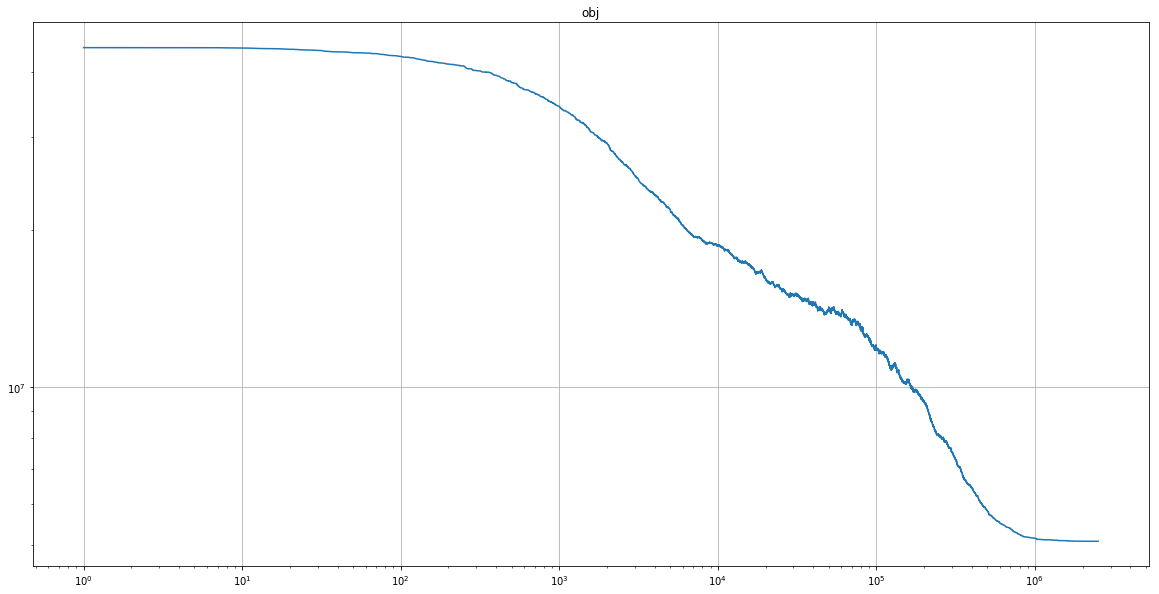

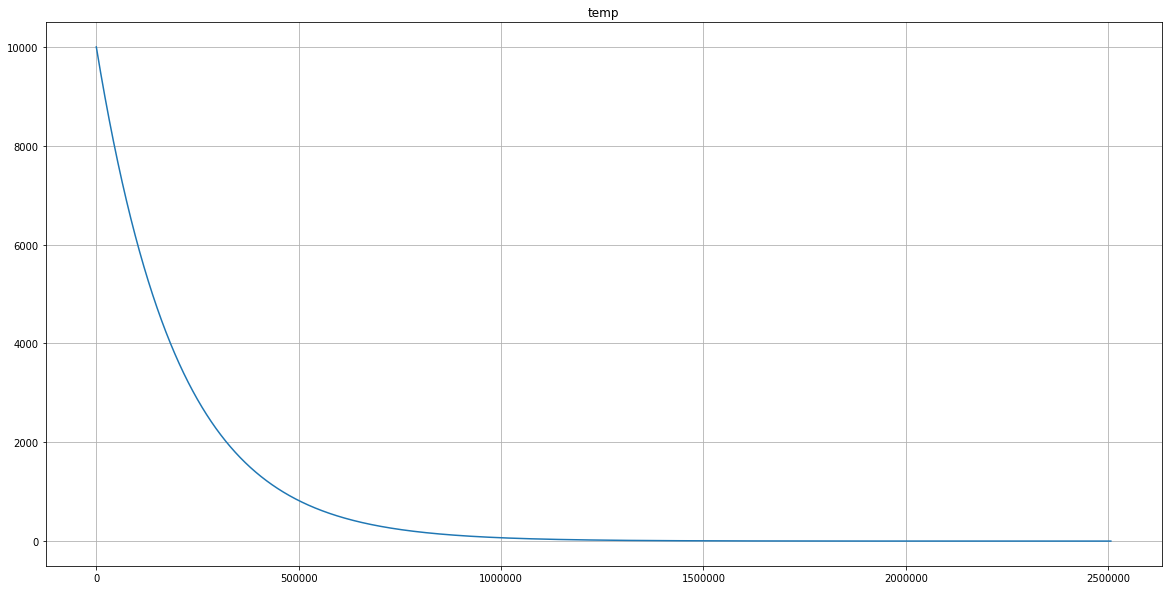

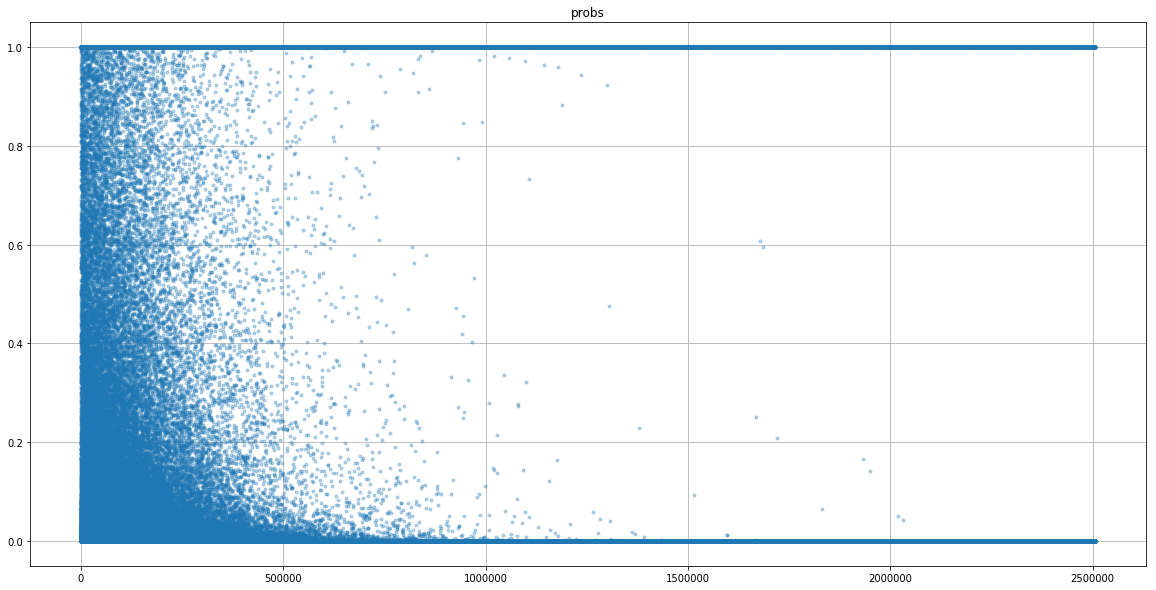

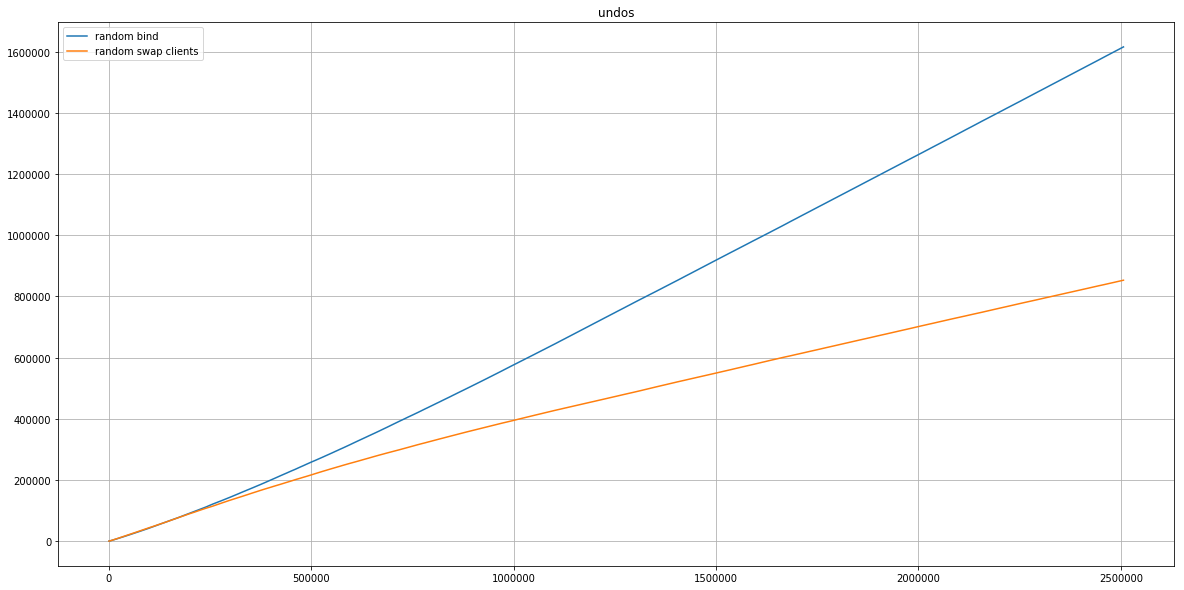

In [7]:
def plot(solution, solver):
    x = solution.stats.improvements_x
    y = solution.stats.improvements_y
    print('solution final', solution.stats.final_value)
    
    fig = plt.figure()
    plt.loglog(x, y)    
    #plt.xlim([2000, 15000])
    #plt.ylim([0, 60000])
    plt.grid()
    plt.title('obj')
    
    fig = plt.figure()
    plt.plot(list(range(len(solution.stats.temperature))), solution.stats.temperature)
    plt.grid()
    plt.title('temp')
    
    fig = plt.figure()
    plt.plot(list(range(len(solution.stats.probs))), solution.stats.probs, '.', alpha=0.3)
    plt.grid()
    plt.title('probs')
    
    fig = plt.figure()
    plt.plot(solution.stats.undos[0], list(range(len(solution.stats.undos[0]))), label='random bind')
    plt.plot(solution.stats.undos[1], list(range(len(solution.stats.undos[1]))), label='random swap clients')
    plt.legend()
    plt.grid()
    plt.title('undos')
    print('total undos', len(solution.stats.undos[0]) + len(solution.stats.undos[1]))
    
    plt.show()

plot(solution, solver)